/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


--- Starting Model Training ---
--- Model Training Complete ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

SCREENSHOT 1: CLASSIFICATION REPORT
                 precision    recall  f1-score   support

No Diabetes (0)       0.81      0.75      0.78        99
   Diabetes (1)       0.60      0.69      0.64        55

       accuracy                           0.73       154
      macro avg       0.71      0.72      0.71       154
   weighted avg       0.74      0.73      0.73       154


SCREENSHOT 2: MODEL ACCURACY/LOSS


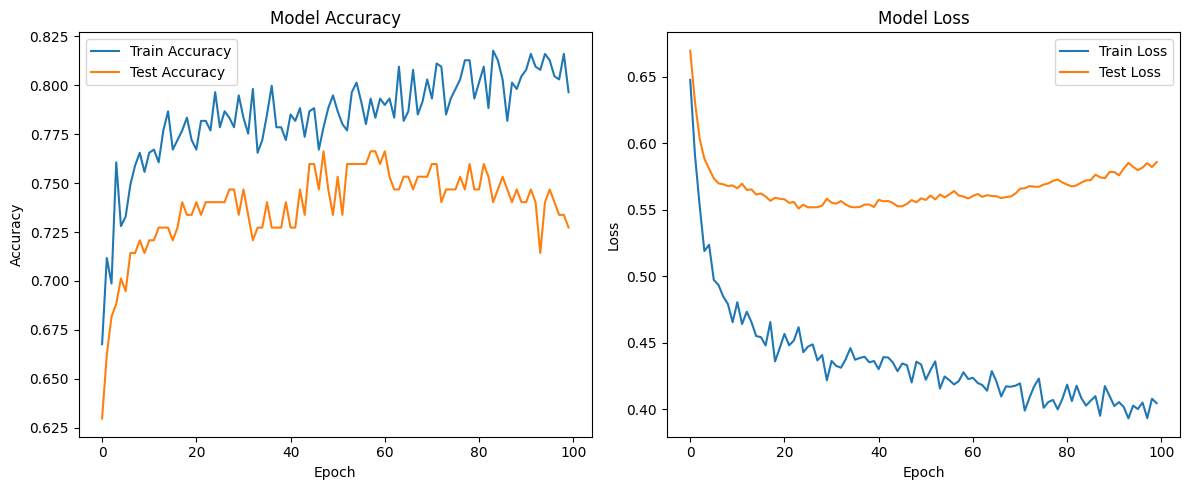

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Load and Preprocess Data ---

# Load the Pima Diabetes dataset from a reliable source
# This is the same dataset Hafsa used
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(data_url, names=column_names)

# Separate features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (CRITICAL for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- 2. Build the MLP Model (Multi-Layer Perceptron) ---

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2)) # Add dropout for regularization
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Sigmoid for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print("--- Starting Model Training ---")

# --- 3. Train the Model ---

# Train the model and save the history
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=10,
    validation_data=(X_test, y_test),
    verbose=0 # Set to 0 to run fast and not flood the output
)

print("--- Model Training Complete ---")

# --- 4. Evaluate and Get Screenshots ---

# A: Get the Classification Report
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int) # Convert probabilities to 0 or 1

print("\n" + "="*30)
print("SCREENSHOT 1: CLASSIFICATION REPORT")
print("="*30)
print(classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)']))


# B: Get the Accuracy/Loss Graph
print("\n" + "="*30)
print("SCREENSHOT 2: MODEL ACCURACY/LOSS")
print("="*30)

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist

print("\n\n" + "="*50)
print("STARTING TROUBLESHOOTING CHALLENGE")
print("="*50)

# --- 1. The Original Buggy Code (for the report) ---
# We just show it as a string
buggy_code = """
# A script to classify MNIST digits (10 classes)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# (Data loading omitted)
# X_train shape is (60000, 28, 28), y_train is (60000,)

model = Sequential([
    Flatten(input_shape=(28, 28, 1)), # Bug 1?
    Dense(128, activation='relu'),
    Dense(1) # Bug 2
])

model.compile(optimizer='adam',
              loss='mean_squared_error', # Bug 3
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
"""
print("--- BUGGY CODE (FOR REPORT) ---")
print(buggy_code)


# --- 2. Load and Prepare MNIST Data ---
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

# Normalize and reshape data
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1).astype('float32') / 255.0


# --- 3. The Corrected & Optimized Code ---
print("\n--- CORRECTED CODE (FOR REPORT) ---")

model_fixed = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # FIX 1: 10 units + softmax activation
])

model_fixed.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy', # FIX 2: Correct loss
                    metrics=['accuracy'])

print(model_fixed.summary()) # Show the fixed model architecture

# --- 4. Train and Evaluate the Fixed Model ---
print("\n--- Training Corrected Model ---")
model_fixed.fit(
    X_train_mnist,
    y_train_mnist,
    epochs=5,
    validation_data=(X_test_mnist, y_test_mnist),
    verbose=0 # Run quietly
)

print("--- Corrected Model Training Complete ---")

loss, accuracy = model_fixed.evaluate(X_test_mnist, y_test_mnist, verbose=0)

print("\n" + "="*30)
print("SCREENSHOT 3: TROUBLESHOOTING RESULT")
print("="*30)
print(f"The fixed model achieved {accuracy * 100:.2f}% accuracy on the test set.")
print("This proves the fixes to the output layer and loss function were successful.")



STARTING TROUBLESHOOTING CHALLENGE
--- BUGGY CODE (FOR REPORT) ---

# A script to classify MNIST digits (10 classes)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# (Data loading omitted)
# X_train shape is (60000, 28, 28), y_train is (60000,)

model = Sequential([
    Flatten(input_shape=(28, 28, 1)), # Bug 1?
    Dense(128, activation='relu'),
    Dense(1) # Bug 2
])

model.compile(optimizer='adam',
              loss='mean_squared_error', # Bug 3
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- CORRECTED CODE (FOR REPORT) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None

--- Training Corrected Model ---
--- Corrected Model Training Complete ---

SCREENSHOT 3: TROUBLESHOOTING RESULT
The fixed model achieved 97.72% accuracy on the test set.
This proves the fixes to the output layer and loss function were successful.
